# Lab 1 - Introduction to digital images and neural networks


This is a summary of basic image concepts, where we will learn how to<br>
- Load an image
- Extract the R,G,B components
- Compute the histograms
- Apply geometric transformations

In [1]:
#import libraries
import math
import numpy as np   
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# skimage - image processing library
from skimage import draw as drw
from skimage import data, io, color, exposure, img_as_float, img_as_ubyte, transform 
from skimage import color

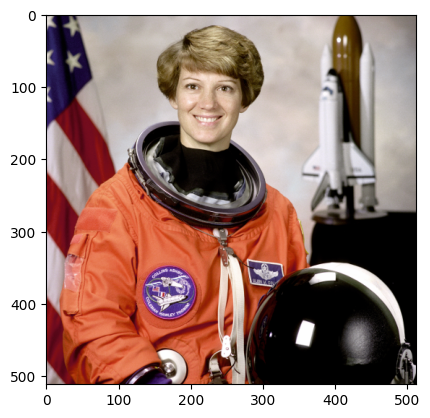

In [3]:
astro = data.astronaut() # image available in skimage

# visualize it
plt.imshow(astro)

In [4]:
print("image data type is: {}".format(type(astro)))
print("image shape is: {}".format(astro.shape))

image data type is: <class 'numpy.ndarray'>
image shape is: (512, 512, 3)


As we saw in the lectues, the images are numpy.nd array and their dimensions are made up with rows, columns and 3 channel (one for each color RGB)

In [5]:
R = astro[:,:,0]
G = astro[:,:,1]
B = astro[:,:,2]
print("R shape is: {}".format(R.shape))
print("G shape is: {}".format(G.shape))
print("B shape is: {}".format(B.shape))

R shape is: (512, 512)
G shape is: (512, 512)
B shape is: (512, 512)


In [6]:
print("Max value for the red channel: {}".format(np.max(R)))
print("Min value for the red channel: {}".format(np.min(R)))

Max value for the red channel: 255
Min value for the red channel: 0


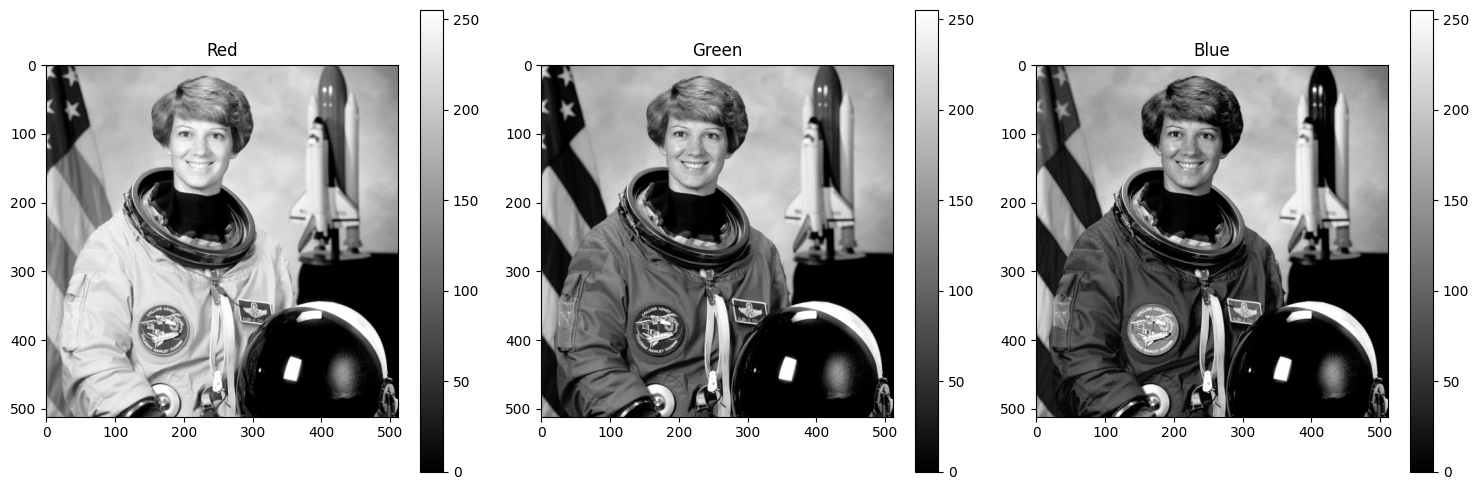

In [7]:
# try t plt different images taking in to acount the color channels

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow((R),cmap='gray');
plt.colorbar(orientation='vertical')
plt.title('Red')

plt.subplot(1,3,2)
plt.imshow((G),cmap='gray');
plt.title('Green')
plt.colorbar(orientation='vertical')

plt.subplot(1,3,3)
plt.imshow((B),cmap='gray');
plt.title('Blue')
plt.colorbar(orientation='vertical')

plt.tight_layout() # a handy command that increases spacing between subplots

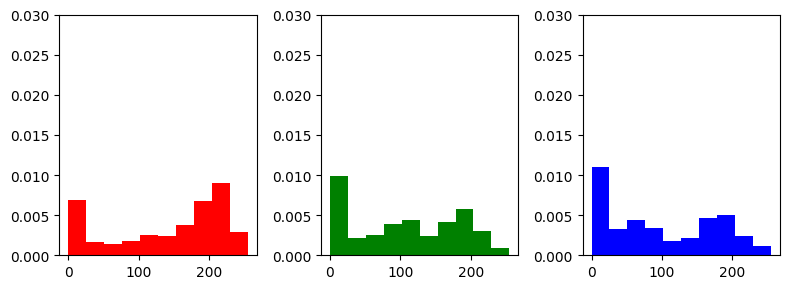

In [10]:
# Color histograms to see the distribution of pixel intensities in each channel.
# For example if inside the image there are more orange pixels, the red histogram will have a higher peak.
plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.hist(R.ravel(), density=True, color='r');
plt.ylim([0,0.03])


plt.subplot(1,3,2)
plt.hist(G.ravel(), density=True, color='g');
plt.ylim([0,0.03])

plt.subplot(1,3,3)
plt.ylim([0,0.03])
plt.hist(B.ravel(), density=True, color='b');

plt.tight_layout() # a handy command that increases spacing between subplots

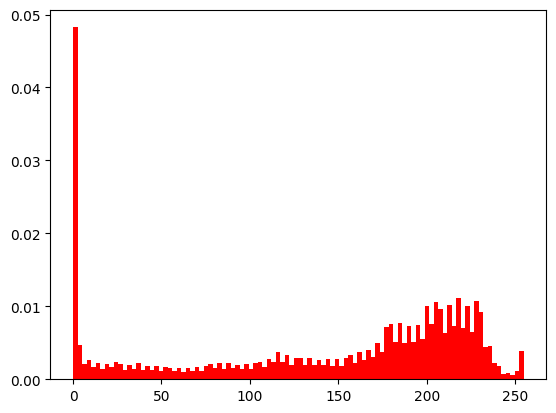

In [17]:
plt.hist(R.ravel(), bins=100, density=True, color='r'); #Try changing the number of bins

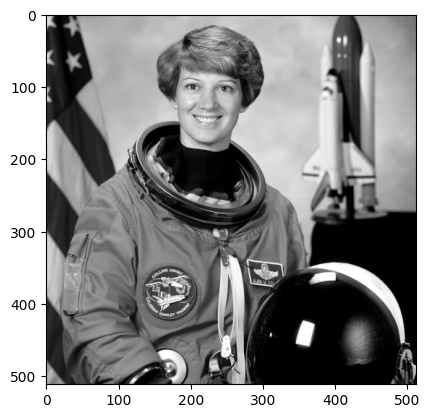

In [18]:
# Convert the image to grayscale
gray_astro = color.rgb2gray(astro)
plt.imshow(gray_astro, cmap='gray');

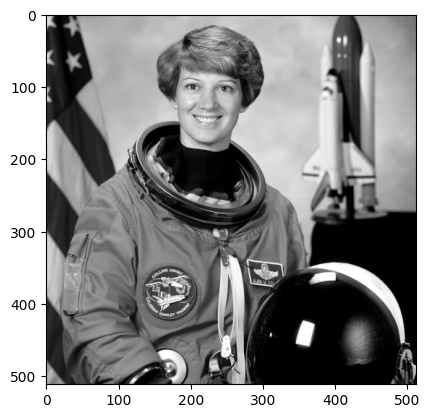

In [8]:
# Try to convert the images in a grey scale using a linear combination of the R, G, B channels
# Y = 0.2125 R + 0.7154 G + 0.0721 B

gray_astro_v2 = 0.2125*R + 0.7154*G + 0.0721*B
plt.imshow(gray_astro_v2, cmap='gray');

# Same as before but using the numpy function dot


## Geometric transformations (Hands-on with rototranslation usefull for data augmentation)

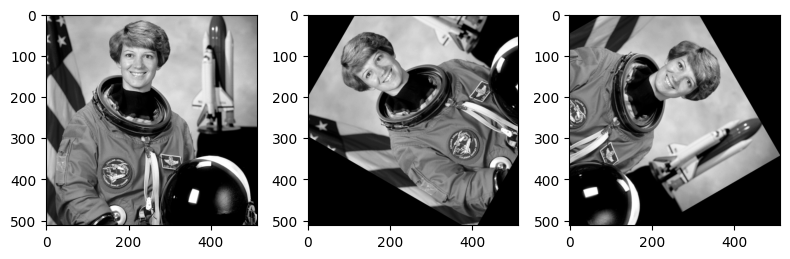

In [20]:
tform = transform.SimilarityTransform(scale=1, rotation=math.pi/3,
                                      translation=(gray_astro.shape[0]/2, -100))

rotated = transform.warp(gray_astro, tform)
back_rotated = transform.warp(gray_astro, tform.inverse)

plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.imshow(gray_astro, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(rotated, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(back_rotated, cmap=plt.cm.gray)

plt.tight_layout()

# Part 2: [Deep] Neural network


In this second part we will:
*  Import a dataset
*  [Optionally] Extract Features (for example color histograms)
*  Build a model
*  Train the model 
*  Evaluate the model
*  Assess train, validation and test accuracy, and reason on overfitting

In [13]:
# import some libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# to avoid problems with certificates when downloading the dataset

In [37]:
# load the dataset (CIFAR10)
num_classes = 10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
(x_learn, y_learn),(x_test, y_test) = cifar10.load_data()

In [38]:
dataset_cifar = tf.data.Dataset.from_tensor_slices((x_learn, y_learn))

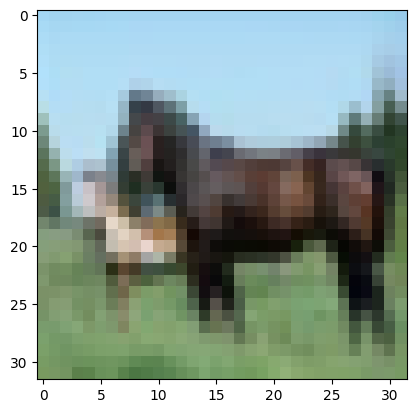

In [39]:
plt.imshow(x_learn[12])

In [42]:
print("Number of elements in the dataset: {}".format(len(list(dataset_cifar.as_numpy_iterator()))))

Number of elements in the dataset: 50000


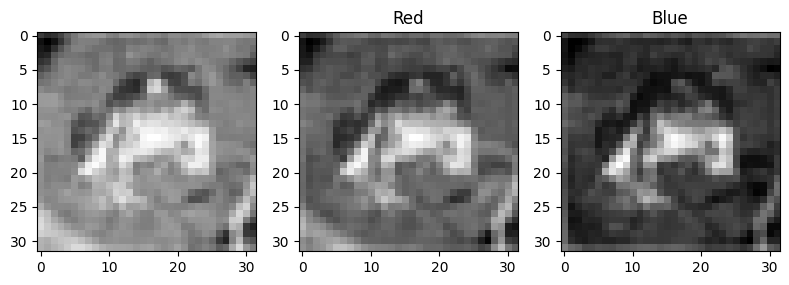

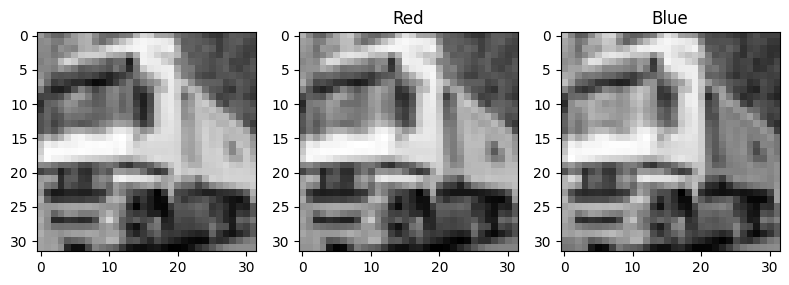

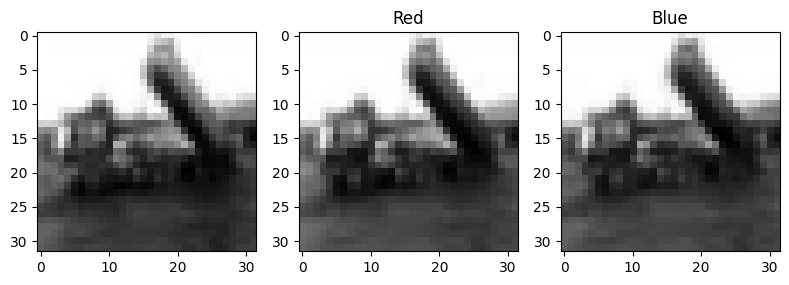

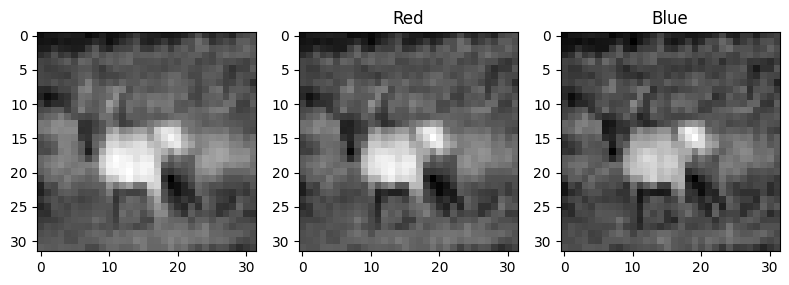

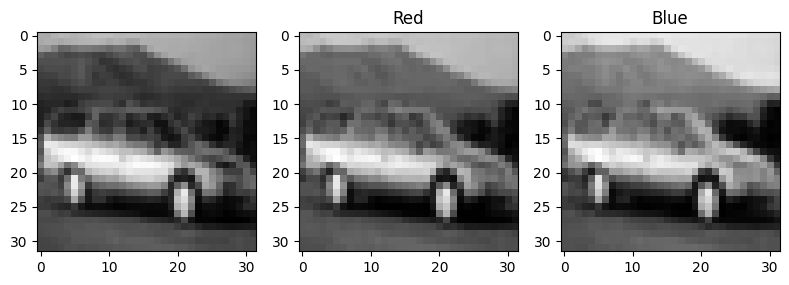

In [44]:
# Printing the first element of the dataset in three different channels R,G,B

for image, label in dataset_cifar.take(5):
    plt.figure(figsize=(8,3))
    plt.subplot(1,3,1)
    plt.imshow(image[:,:,0], cmap='gray') # R channel
    plt.subplot(1,3,2)
    plt.title('Red')
    plt.imshow(image[:,:,1], cmap='gray') # G channel
    plt.subplot(1,3,3)
    plt.title('Green')
    plt.imshow(image[:,:,2], cmap='gray') # B channel
    plt.tight_layout()
    plt.title('Blue')



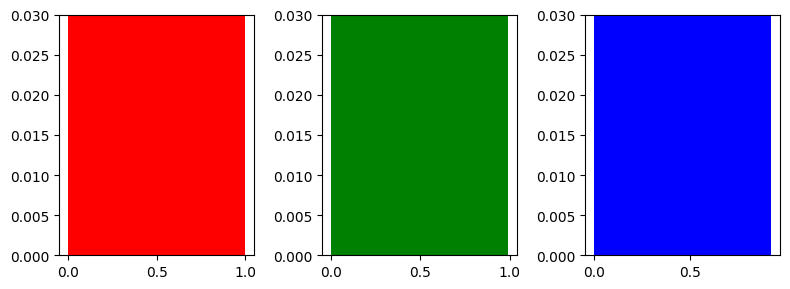

In [56]:
# Now we can visulize the color histograms for the first image in the dataset

R1 = x_learn[0][:,:,0]
G1 = x_learn[0][:,:,1]
B1 = x_learn[0][:,:,2]

plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.hist(R1.ravel(), density=True, color='r');
plt.ylim([0,0.03])

plt.subplot(1,3,2)
plt.hist(G1.ravel(), density=True, color='g');
plt.ylim([0,0.03])

plt.subplot(1,3,3)
plt.ylim([0,0.03])
plt.hist(B1.ravel(), density=True, color='b');

plt.tight_layout() # a handy command that increases spacing between subplots

In [46]:
# Normalize the data in [0 1]
print("Normalizing training set..")
x_learn = np.asarray(x_learn, dtype=np.float32) / 255 # Normalizing training set
print("Normalizing test set..")
x_tlinest = np.asarray(x_test, dtype=np.float32) / 255 # Normalizing test set

Normalizing training set..
Normalizing test set..


In [47]:
# split in training and validation
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size=0.25, random_state=12)

In [48]:
# Standardizing the data
def standardize_dataset(X):
    image_means = []
    image_stds = []

    for image in X:
        image_means.append(np.mean(image)) # Computing the image mean
        image_stds.append(np.std(image)) # Computing the image standard deviation

    dataset_mean = np.mean(image_means) # Computing the dataset mean
    dataset_std = np.mean(image_stds) # Computing the dataset standard deviation
    return [dataset_mean, dataset_std] # For every image we subtract to it the dataset mean and we divide by the dataset standard deviation

dataset_mean, dataset_std = standardize_dataset(x_train)

print("Standardizing training set..")
x_train = (x_train-dataset_mean)/dataset_std # Standardizing the training set
print("Standardizing validation set..")
x_val = (x_val-dataset_mean)/dataset_std # Standardizing the test set
print("Standardizing test set..")
x_test = (x_test-dataset_mean)/dataset_std # Standardizing the test set

# one hot encode target values
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

print("Size of the training set")
print("x_train", x_train.shape)
print("y_train", y_train.shape)

print("Size of the validation set")
print("x_val", x_val.shape)
print("y_val", y_val.shape)

print("Size of the test set")
print("x_test", x_test.shape)
print("y_test", y_test.shape)

Standardizing training set..
Standardizing validation set..
Standardizing test set..
Size of the training set
x_train (37500, 32, 32, 3)
y_train (37500, 10)
Size of the validation set
x_val (12500, 32, 32, 3)
y_val (12500, 10)
Size of the test set
x_test (10000, 32, 32, 3)
y_test (10000, 10)


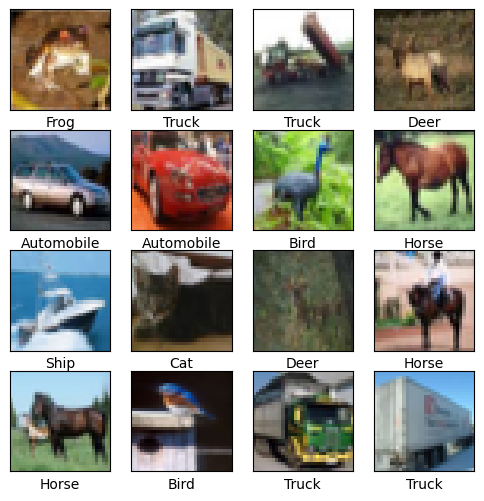

In [49]:
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_learn[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_learn[i,0]])
plt.show()

In [50]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [51]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # output layer with 10 classes
])

In [52]:
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, RMSprop  # TODO: grub from 'legacy' in new tf version
#from tensorflow.keras.optimizers.experimental import Nadam  # TODO:  grub from 'experimental' in new tf version

In [53]:
adam = Adam(learning_rate=0.001)
loss = ['categorical_crossentropy']
metrics = ['accuracy','precision','recall']

In [54]:
# Compile the model you created before using 
# adam optimizer as optimizer
# categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
              loss=loss[0],
              metrics=[metrics[0]])

In [57]:
batch_size = 128
epochs = 20
# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data =(x_val, y_val), epochs=epochs)

Epoch 1/20
293/293 [==============================] - 19s 65ms/step - loss: 0.9451 - accuracy: 0.6707 - val_loss: 0.9337 - val_accuracy: 0.6859
Epoch 2/20
293/293 [==============================] - 19s 66ms/step - loss: 0.8870 - accuracy: 0.6919 - val_loss: 0.9017 - val_accuracy: 0.6910
Epoch 3/20
293/293 [==============================] - 20s 68ms/step - loss: 0.8414 - accuracy: 0.7069 - val_loss: 0.8905 - val_accuracy: 0.6933
Epoch 4/20
293/293 [==============================] - 19s 66ms/step - loss: 0.8021 - accuracy: 0.7189 - val_loss: 0.8393 - val_accuracy: 0.7106
Epoch 5/20
293/293 [==============================] - 17s 59ms/step - loss: 0.7668 - accuracy: 0.7316 - val_loss: 0.8244 - val_accuracy: 0.7178
Epoch 6/20
293/293 [==============================] - 18s 61ms/step - loss: 0.7419 - accuracy: 0.7377 - val_loss: 0.8234 - val_accuracy: 0.7148
Epoch 7/20
293/293 [==============================] - 18s 61ms/step - loss: 0.7111 - accuracy: 0.7506 - val_loss: 0.8144 - val_accuracy:

In [58]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
  

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

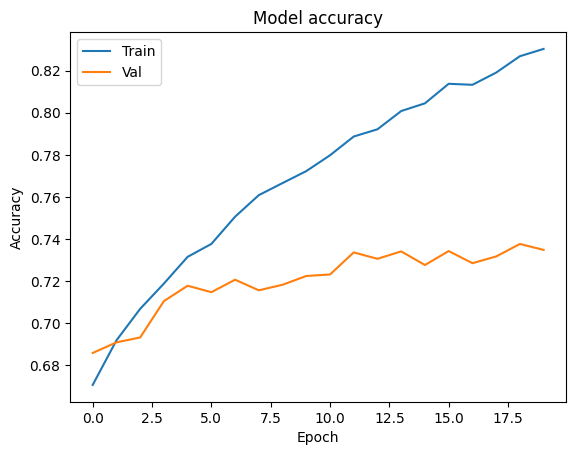

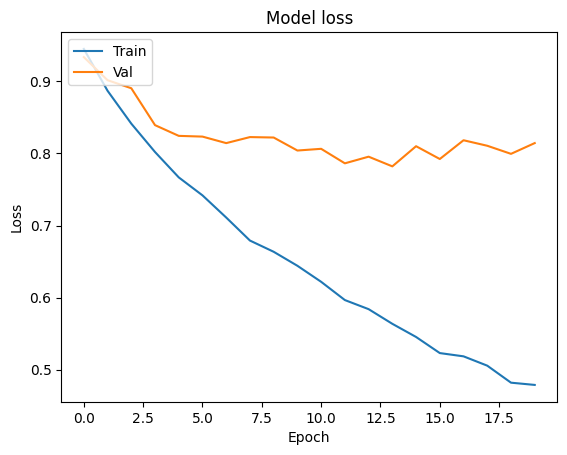

In [59]:
plot_history(history)

In [60]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 252.4908 - accuracy: 0.4945
Train: 0.924, Test: 0.495


# Learning from color histograms

In [61]:
# load the dataset
num_classes = 10 
cifar10 = tf.keras.datasets.cifar10
(x_learn, y_learn),(x_test, y_test) = cifar10.load_data()
# note that it is not required to normalize the pixel intensities anymore

hist_learn = []
hist_test = []
num_pixels = np.prod(x_learn[0].shape[:2])  # 32*32, the dimensions of CIFAR10 images
for sample_learn in x_learn:
    hist_learn.append(np.concatenate([np.histogram(sample_learn[:,:,0].ravel())[0]/num_pixels,
                                    np.histogram(sample_learn[:,:,1].ravel())[0]/num_pixels,
                                    np.histogram(sample_learn[:,:,2].ravel())[0]/num_pixels]))
    
for sample_test in x_test:
    hist_test.append(np.concatenate([np.histogram(sample_test[:,:,0].ravel())[0]/num_pixels,
                                   np.histogram(sample_test[:,:,1].ravel())[0]/num_pixels,
                                   np.histogram(sample_test[:,:,2].ravel())[0]/num_pixels]))

hist_learn = np.array(hist_learn)
hist_test = np.array(hist_test)


print(hist_learn.shape)

(50000, 30)


In [62]:
x_train_hist, x_val_hist, y_train, y_val = train_test_split(hist_learn, y_learn, test_size=0.25, random_state=12)

y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

print("Size of the training set")
print("x_train", x_train_hist.shape)
print("y_train", y_train.shape)

print("Size of the validation set")
print("x_val", x_val_hist.shape)
print("y_val", y_val.shape)

print("Size of the test set")
print("x_test", hist_test.shape)
print("y_test", y_test.shape)

Size of the training set
x_train (37500, 30)
y_train (37500, 10)
Size of the validation set
x_val (12500, 30)
y_val (12500, 10)
Size of the test set
x_test (10000, 30)
y_test (10000, 10)


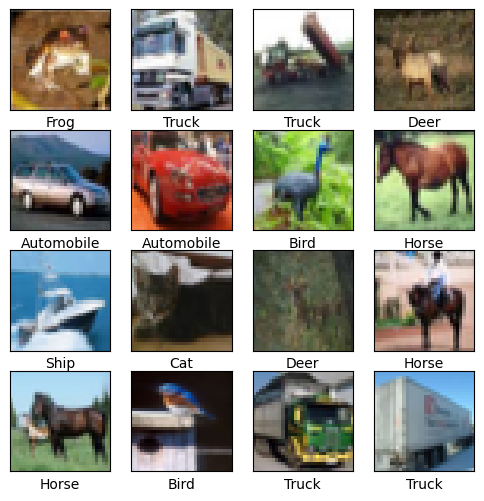

In [63]:
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_learn[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_learn[i,0]])
plt.show()

In [64]:
# Building the model

model_features = Sequential([
    layers.Flatten(input_shape=(hist_learn.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [65]:
# Compile the model, and run the fitting
adam = Adam(learning_rate=0.001)
model_features.compile(optimizer=adam,
              loss=loss[0],
              metrics=[metrics[0]])

In [66]:
batch_size = 128
epochs = 20
history = model_features.fit(x_train_hist, y_train, batch_size=batch_size, validation_data=(x_val_hist, y_val), epochs=epochs)

Epoch 1/20
293/293 [==============================] - 2s 3ms/step - loss: 2.2213 - accuracy: 0.1599 - val_loss: 2.1490 - val_accuracy: 0.1889
Epoch 2/20
293/293 [==============================] - 1s 2ms/step - loss: 2.0836 - accuracy: 0.2188 - val_loss: 2.0493 - val_accuracy: 0.2266
Epoch 3/20
293/293 [==============================] - 1s 2ms/step - loss: 2.0046 - accuracy: 0.2478 - val_loss: 1.9900 - val_accuracy: 0.2586
Epoch 4/20
293/293 [==============================] - 1s 2ms/step - loss: 1.9760 - accuracy: 0.2629 - val_loss: 1.9756 - val_accuracy: 0.2657
Epoch 5/20
293/293 [==============================] - 1s 2ms/step - loss: 1.9592 - accuracy: 0.2737 - val_loss: 1.9587 - val_accuracy: 0.2780
Epoch 6/20
293/293 [==============================] - 1s 2ms/step - loss: 1.9450 - accuracy: 0.2819 - val_loss: 1.9519 - val_accuracy: 0.2836
Epoch 7/20
293/293 [==============================] - 1s 2ms/step - loss: 1.9360 - accuracy: 0.2888 - val_loss: 1.9439 - val_accuracy: 0.2862
Epoch 

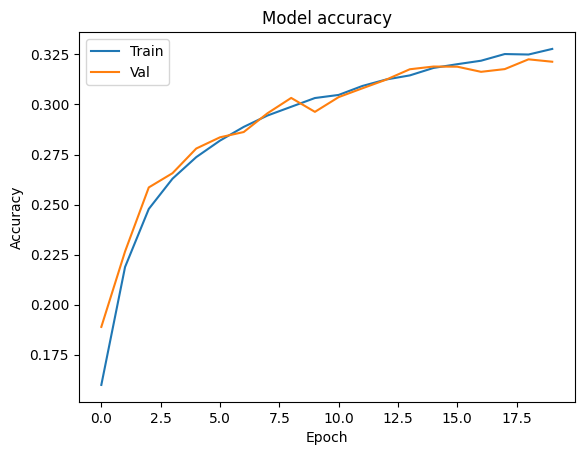

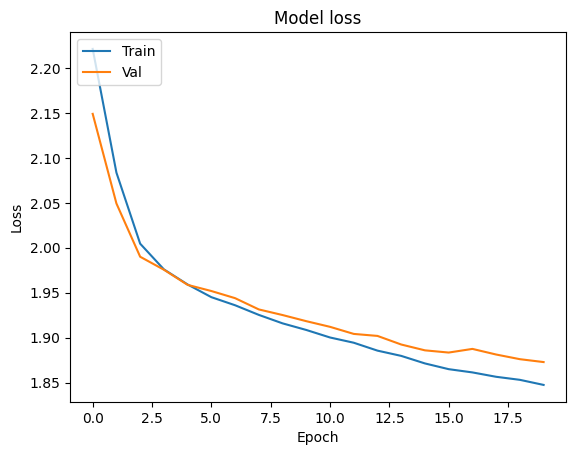

In [67]:
plot_history(history)

In [68]:
_, train_acc = model_features.evaluate(x_train_hist, y_train, verbose=1)
_, test_acc = model_features.evaluate(hist_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 1.8563 - accuracy: 0.3327
Train: 0.332, Test: 0.333
